In [1]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

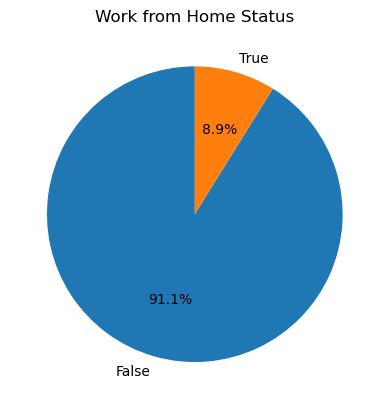

In [13]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

In [14]:
df[['job_work_from_home', 'job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


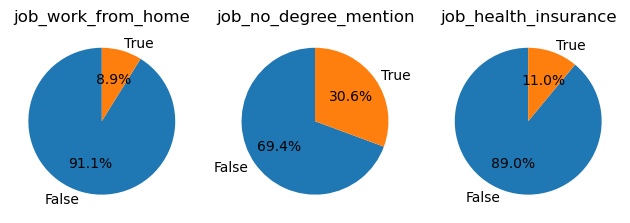

In [35]:
pie = ['job_work_from_home','job_no_degree_mention', 'job_health_insurance']

fig, ax = plt.subplots(1, 3)

for i, pie in enumerate(pie):
    df[pie].value_counts().plot(kind='pie', ax= ax[i], startangle=90, autopct='%1.1f%%', title=pie)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

fig.tight_layout()

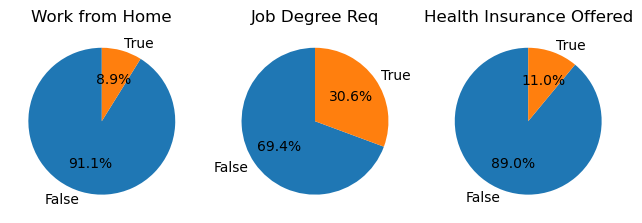

In [51]:
fig, ax = plt.subplots(1, 3)


dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in  enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()
